In [188]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Lists for holding all the data
real_text = []
fake_text = []

# Load all files from the dataset directory
path_to_json_real = './dataset/real_news/'
path_to_json_fake = './dataset/fake_news/'

real_json_files = [json_file for json_file in os.listdir(path_to_json_real) if json_file.endswith('.json')]
fake_json_files = [json_file for json_file in os.listdir(path_to_json_fake) if json_file.endswith('.json')]

for real_json_file in real_json_files:
    open_json = open(os.path.join(path_to_json_real, real_json_file))
    real_text.append(json.load(open_json))

for fake_json_file in fake_json_files:
    open_json = open(os.path.join(path_to_json_fake, fake_json_file))
    fake_text.append(json.load(open_json))

pd_real = pd.DataFrame.from_dict(real_text)
pd_fake = pd.DataFrame.from_dict(fake_text)



# Simple Analysis

* Analysis based on the number of likes, reposts and comments, without using natural language processing

1. Analyse real and fake news separately.

2. Get maximum, minimum, average, median for each of the parameters.

3. Plot each of the parameters.

Statistics about likes of real news
Mean: 32049.778409090908  Standard Deviation: 85879.22762397358
Maximum: 1179103  Minimum: 636  Median: 8750.0 

Statistics about likes of fake news
Mean: 1293.9418604651162  Standard Deviation: 9953.240984803202
Maximum: 145108  Minimum: 0  Median: 16.5 



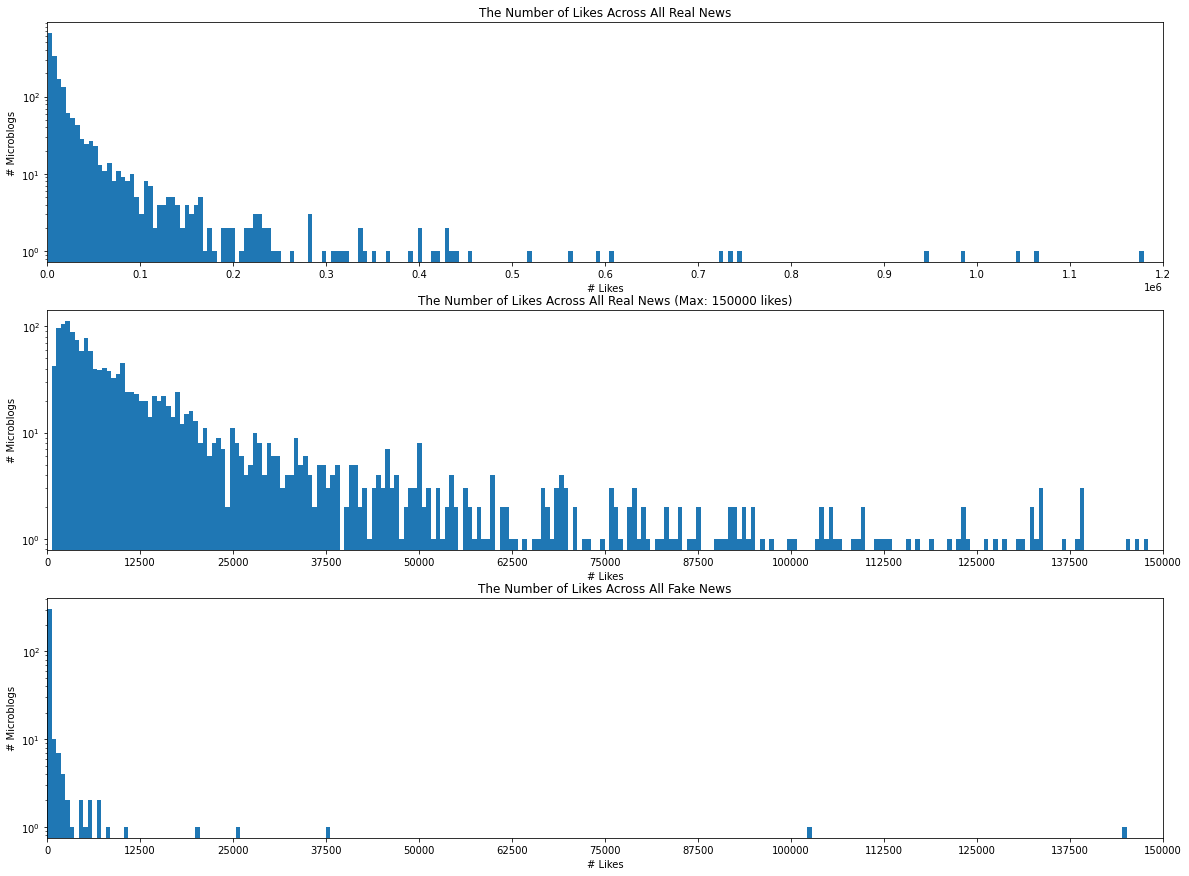

The number of fake news without likes is: 36
This accounts for 10.465116279069768 % of all fake news.

The number of fake news with fewer likes than the minimum likes of real news (636 likes) is 307
This accounts for 89.24418604651163 % of all fake news.

On average, real news have 24.769102374947817 times more likes than fake news.
On median, real news have 530.3030303030303 times more likes than fake news.



In [189]:
# Analysing number of likes

like_nums = pd_real['like_num'].astype('int')
print ("Statistics about likes of real news")
print ("Mean:", str(like_nums.mean()), " Standard Deviation:", str(like_nums.std()))
print ("Maximum:", str(like_nums.max()), " Minimum:", str(like_nums.min()), " Median:", str(like_nums.median()), "\n")


fake_like_nums = pd_fake['like_num'].astype('int')
print ("Statistics about likes of fake news")
print ("Mean:", str(fake_like_nums.mean()), " Standard Deviation:", str(fake_like_nums.std()))
print ("Maximum:", str(fake_like_nums.max()), " Minimum:", str(fake_like_nums.min()), " Median:", str(fake_like_nums.median()), "\n")


plt.figure(figsize=(20, 15))

# Plot real news
plt.subplot(3,1,1)
plt.hist(like_nums, bins=240)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
plt.xlim([0, 1200000])
plt.xticks(np.linspace(0, 1200000, num=13))
plt.yscale('log')
plt.title("The Number of Likes Across All Real News")

# Plot real news in the range of likes of fake news
plt.subplot(3,1,2)
plt.hist(like_nums[like_nums<=150000], bins=240)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
plt.xlim([0, 150000])
plt.xticks(np.linspace(0, 150000, num=13))
plt.yscale('log')
plt.title("The Number of Likes Across All Real News (Max: 150000 likes)")

# Plot fake news
plt.subplot(3,1,3)
plt.hist(fake_like_nums, bins=240)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
plt.xlim([0, 150000])
plt.xticks(np.linspace(0, 150000, num=13))
plt.yscale('log')
plt.title("The Number of Likes Across All Fake News")

plt.show()


# Some facts about fake news
print ("The number of fake news without likes is:", str(len(fake_like_nums[fake_like_nums==0])))
print ("This accounts for", str(len(fake_like_nums[fake_like_nums==0]) / len(fake_like_nums) * 100), "% of all fake news.\n")

print ("The number of fake news with fewer likes than the minimum likes of real news (636 likes) is", str(len(fake_like_nums[fake_like_nums<636])))
print ("This accounts for", str(len(fake_like_nums[fake_like_nums<636]) / len(fake_like_nums) * 100), "% of all fake news.\n")

print ("On average, real news have", str(like_nums.mean() / fake_like_nums.mean()), "times more likes than fake news.")
print ("On median, real news have", str(like_nums.median() / fake_like_nums.median()), "times more likes than fake news.\n")



Statistics about comments of real news
Mean: 2122.28125  Standard Deviation: 3810.97161752411
Maximum: 73717  Minimum: 66  Median: 993.5 

Statistics about comments of fake news
Mean: 109.7936046511628  Standard Deviation: 600.9868423534848
Maximum: 7224  Minimum: 0  Median: 10.0 



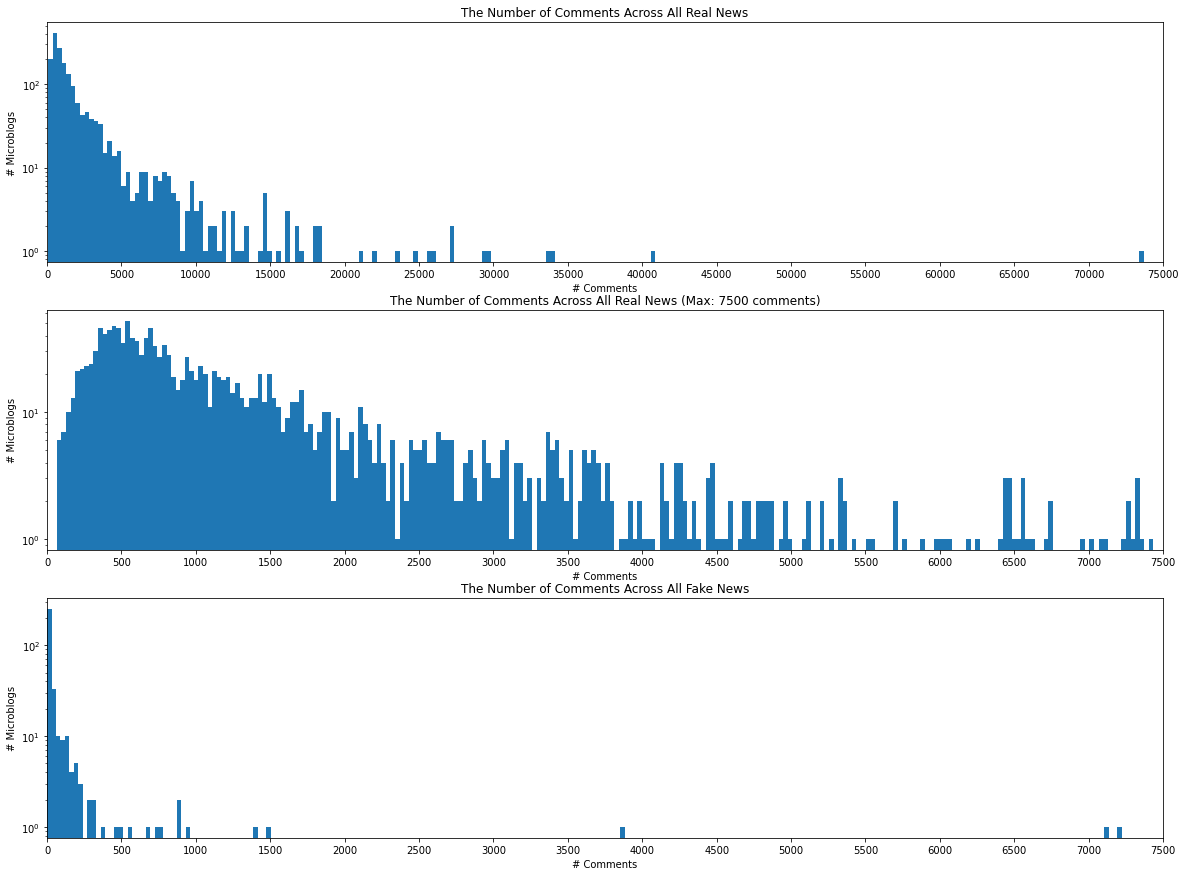

The number of fake news without comments is: 52
This accounts for 15.11627906976744 % of all fake news.

The number of fake news with fewer comments than the minimum comments of real news (66 comments) is 285
This accounts for 82.84883720930233 % of all fake news.

On average, real news have 19.32973470306336 times more comments than fake news.
On median, real news have 99.35 times more comments than fake news.



In [190]:
# Analysing number of comments

comment_nums = pd_real['comment_num'].astype('int')
print ("Statistics about comments of real news")
print ("Mean:", str(comment_nums.mean()), " Standard Deviation:", str(comment_nums.std()))
print ("Maximum:", str(comment_nums.max()), " Minimum:", str(comment_nums.min()), " Median:", str(comment_nums.median()), "\n")


fake_comment_nums = pd_fake['comment_num'].astype('int')
print ("Statistics about comments of fake news")
print ("Mean:", str(fake_comment_nums.mean()), " Standard Deviation:", str(fake_comment_nums.std()))
print ("Maximum:", str(fake_comment_nums.max()), " Minimum:", str(fake_comment_nums.min()), " Median:", str(fake_comment_nums.median()), "\n")




plt.figure(figsize=(20, 15))

# Plot real news
plt.subplot(3,1,1)
plt.hist(comment_nums, bins=240)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
plt.xlim([0, 75000])
plt.xticks(np.linspace(0, 75000, num=16))
plt.yscale('log')
plt.title("The Number of Comments Across All Real News")

# Plot real news in the range of comments of fake news
plt.subplot(3,1,2)
plt.hist(comment_nums[comment_nums<=7500], bins=240)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
plt.xlim([0, 7500])
plt.xticks(np.linspace(0, 7500, num=16))
plt.yscale('log')
plt.title("The Number of Comments Across All Real News (Max: 7500 comments)")

# Plot fake news
plt.subplot(3,1,3)
plt.hist(fake_comment_nums, bins=240)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
plt.xlim([0, 7500])
plt.xticks(np.linspace(0, 7500, num=16))
plt.yscale('log')
plt.title("The Number of Comments Across All Fake News")

plt.show()


# Some facts about fake news
print ("The number of fake news without comments is:", str(len(fake_comment_nums[fake_comment_nums==0])))
print ("This accounts for", str(len(fake_comment_nums[fake_comment_nums==0]) / len(fake_comment_nums) * 100), "% of all fake news.\n")

print ("The number of fake news with fewer comments than the minimum comments of real news (66 comments) is", str(len(fake_comment_nums[fake_comment_nums<66])))
print ("This accounts for", str(len(fake_comment_nums[fake_comment_nums<66]) / len(fake_comment_nums) * 100), "% of all fake news.\n")

print ("On average, real news have", str(comment_nums.mean() / fake_comment_nums.mean()), "times more comments than fake news.")
print ("On median, real news have", str(comment_nums.median() / fake_comment_nums.median()), "times more comments than fake news.\n")


Statistics about reposts of real news
Mean: 4142.440909090909  Standard Deviation: 53283.92636720973
Maximum: 1886915  Minimum: 82  Median: 755.0 

Statistics about comments of fake news
Mean: 162.02325581395348  Standard Deviation: 1625.2574425486048
Maximum: 27199  Minimum: 0  Median: 2.0 



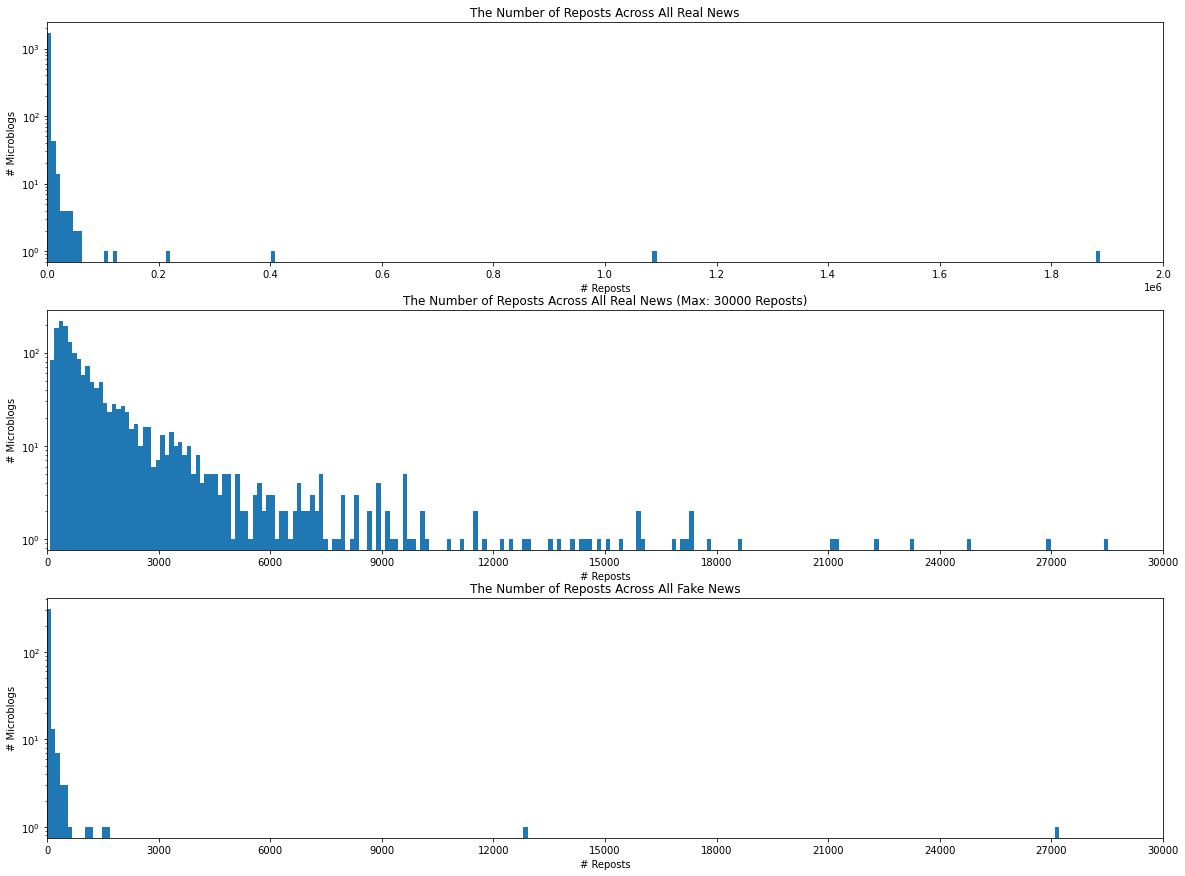

The number of fake news without reposts is: 115
This accounts for 33.43023255813954 % of all fake news.

The number of fake news with fewer reposts than the minimum reposts of real news (82 reposts) is 304
This accounts for 88.37209302325581 % of all fake news.

On average, real news have 25.5669526468938 times more reposts than fake news.
On median, real news have 377.5 times more reposts than fake news.



In [191]:
# Analysing number of reposts

repost_nums = pd_real['repost_num'].astype('int')
print ("Statistics about reposts of real news")
print ("Mean:", str(repost_nums.mean()), " Standard Deviation:", str(repost_nums.std()))
print ("Maximum:", str(repost_nums.max()), " Minimum:", str(repost_nums.min()), " Median:", str(repost_nums.median()), "\n")


fake_repost_nums = pd_fake['repost_num'].astype('int')
print ("Statistics about comments of fake news")
print ("Mean:", str(fake_repost_nums.mean()), " Standard Deviation:", str(fake_repost_nums.std()))
print ("Maximum:", str(fake_repost_nums.max()), " Minimum:", str(fake_repost_nums.min()), " Median:", str(fake_repost_nums.median()), "\n")




plt.figure(figsize=(20, 15))

# Plot real news
plt.subplot(3,1,1)
plt.hist(repost_nums, bins=240)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
plt.xlim([0, 2000000])
plt.xticks(np.linspace(0, 2000000, num=11))
plt.yscale('log')
plt.title("The Number of Reposts Across All Real News")

# Plot real news in the range of comments of fake news
plt.subplot(3,1,2)
plt.hist(repost_nums[repost_nums<=30000], bins=240)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
plt.xlim([0, 30000])
plt.xticks(np.linspace(0, 30000, num=11))
plt.yscale('log')
plt.title("The Number of Reposts Across All Real News (Max: 30000 Reposts)")

# Plot fake news
plt.subplot(3,1,3)
plt.hist(fake_repost_nums, bins=240)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
plt.xlim([0, 30000])
plt.xticks(np.linspace(0, 30000, num=11))
plt.yscale('log')
plt.title("The Number of Reposts Across All Fake News")

plt.show()


# Some facts about fake news
print ("The number of fake news without reposts is:", str(len(fake_repost_nums[fake_repost_nums==0])))
print ("This accounts for", str(len(fake_repost_nums[fake_repost_nums==0]) / len(fake_repost_nums) * 100), "% of all fake news.\n")

print ("The number of fake news with fewer reposts than the minimum reposts of real news (82 reposts) is", str(len(fake_repost_nums[fake_repost_nums<82])))
print ("This accounts for", str(len(fake_repost_nums[fake_repost_nums<82]) / len(fake_repost_nums) * 100), "% of all fake news.\n")

print ("On average, real news have", str(repost_nums.mean() / fake_repost_nums.mean()), "times more reposts than fake news.")
print ("On median, real news have", str(repost_nums.median() / fake_repost_nums.median()), "times more reposts than fake news.\n")

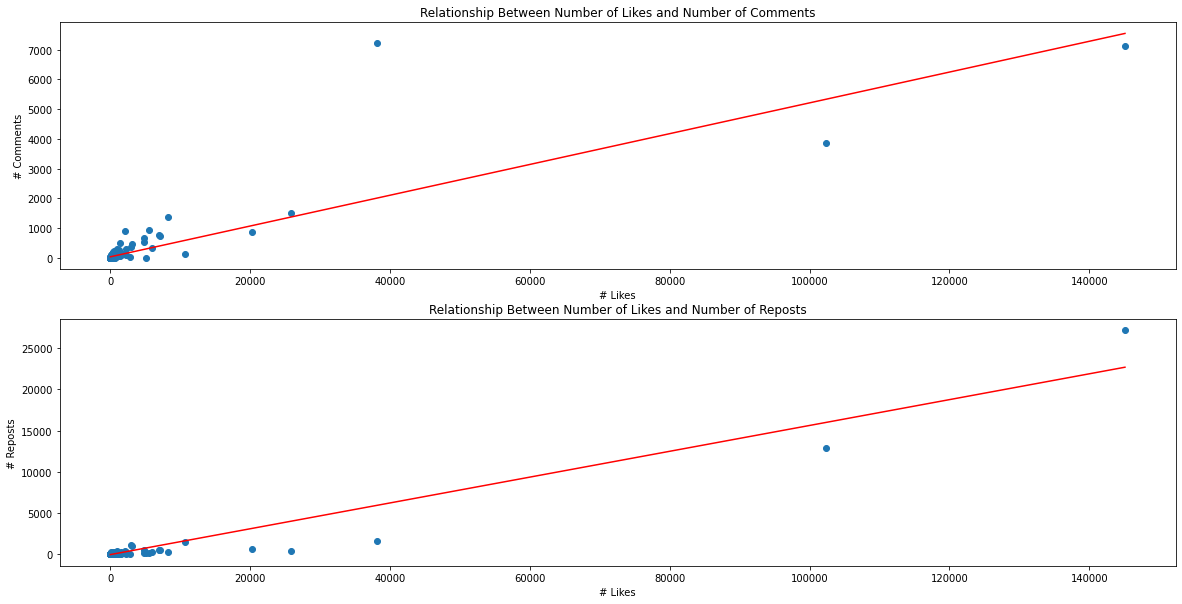

In [192]:
# Plot the relationship between likes and comments/reposts
fake_comments = pd_fake[['like_num','comment_num','repost_num']].astype('int')
fake_comments = fake_comments.sort_values('like_num')


plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.scatter(fake_comments['like_num'], fake_comments['comment_num'])
plt.xlabel('# Likes')
plt.ylabel('# Comments')

m, b = np.polyfit(fake_comments['like_num'], fake_comments['comment_num'], 1)
plt.plot(fake_comments['like_num'], m*fake_comments['like_num']+b, color='red')
plt.title("Relationship Between Number of Likes and Number of Comments")


plt.subplot(2,1,2)
plt.scatter(fake_comments['like_num'], fake_comments['repost_num'])
plt.xlabel('# Likes')
plt.ylabel('# Reposts')

m, b = np.polyfit(fake_comments['like_num'], fake_comments['repost_num'], 1)
plt.plot(fake_comments['like_num'], m*fake_comments['like_num']+b, color='red')
plt.title("Relationship Between Number of Likes and Number of Reposts")

plt.show()



# Analysing the Stance of the Comments of Fake News

Objective: How different topics of fake news affect the reaction of the comments of the posts

1. Summarising the posts and extracting the topics from them

In [193]:
# Summarising fake news
import re                       # Regular expression library to clean the texts
import stopwordsiso             # Library of stopwords for different languages
from stopwordsiso import stopwords

import jieba                    # Library for tagging sentences
import jieba.posseg as pseg

# Clean stopwords
def clean_stopword(text):
    stopword = stopwords(['zh'])    # Retrieve Chinese stopwords
    remove_stw = [word for word in text if not word in stopword]
    return remove_stw

# Remove non-English, Chinese characters, or numbers
def clean_text(text):
    text_cleaner = re.compile(pattern="[^"
        u"\u4e00-\u9fa5"      # Chinese characters
        u"\uFF00-\uFFEF"      # Halfwidth and Fullwidth forms
        u"a-zA-Z0-9"
        "]+"
        , flags=re.UNICODE)
    new_text = text_cleaner.sub(r'', text)  # Replace all characters that does not fit the above the regular expression

    link_remover = re.compile(pattern="[网页|链接|视频]+", flags=re.UNICODE) # Remove the words webpage and link because they just indicate a video on the post
    new_text = link_remover.sub(r'', new_text)

    return new_text

# Extract the number of likes, text, comments, and reposts of all fake news
comments = pd_fake[['like_num','text','comments','reposts']]

# Sort fake news by the number of likes
comments = comments.astype({"like_num": int})
comments = comments.sort_values('like_num')

cleaned_posts = []

for index, row in comments.iterrows():
    text = clean_text(row['text'])
    word_flags = pseg.lcut(text)    # Separate the sentences into pairs of word and its part of speech
    words = []
    for word_flag in word_flags:
        if word_flag.flag in ['ns', 'n', 'v']:     # Only keep words that are nouns, verbs, or proper nouns
            words.append(word_flag.word)
    cleaned_posts.append(clean_stopword(words))



In [241]:
import gensim
from gensim.utils import simple_preprocess

dictionary = gensim.corpora.Dictionary(cleaned_posts)
dictionary.filter_extremes(no_above=0.1)

# Create the corpus for the dictionary
bow_corpus = [dictionary.doc2bow(doc) for doc in cleaned_posts]
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, passes=100)
topic_dic = dict()
for idx, topic in lda_model.print_topics(-1):
    topic_dic['topic {}'.format(idx)] = topic.split('+')
pd.DataFrame(topic_dic)

# Code adapted from Chuanrong Li (https://github.com/Lichuanro/Chinese-NLP-Hands-On-Practice/blob/master/LDA/LDA.ipynb)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14
0,"0.051*""封闭""","0.142*""院士""","0.104*""蚊虫""","0.041*""陆地""","0.065*""总统""","0.197*""襄阳""","0.112*""开学""","0.030*""地震""","0.246*""武汉""","0.068*""军舰""","0.108*""俄罗斯""","0.092*""戴""","0.075*""日本""","0.168*""复工""","0.069*""女子"""
1,"0.040*""钟止""","0.068*""钟南山""","0.095*""警告""","0.039*""入境""","0.051*""物资""","0.140*""湖北""","0.055*""小学""","0.028*""宾馆""","0.050*""应该""","0.058*""船""","0.049*""狮子""","0.062*""拒绝""","0.063*""试剂盒""","0.129*""全国""","0.057*""治疗"""
2,"0.040*""南关""","0.038*""出征""","0.086*""发出""","0.036*""广西""","0.046*""受""","0.084*""封省""","0.034*""继续""","0.027*""调入""","0.044*""没""","0.056*""拥有""","0.047*""国家""","0.052*""知道""","0.047*""物资""","0.091*""发电厂""","0.045*""患者"""
3,"0.040*""年龄""","0.037*""加油""","0.052*""据说""","0.034*""大量""","0.042*""酒精""","0.068*""加油""","0.032*""会议""","0.027*""遇上""","0.037*""看到""","0.054*""神山""","0.035*""放""","0.052*""死""","0.036*""本土""","0.077*""聚集""","0.041*""药物"""
4,"0.040*""出山""","0.029*""人民""","0.052*""冠""","0.030*""外国人""","0.032*""希望""","0.031*""小时""","0.032*""国道""","0.024*""医生""","0.037*""感谢""","0.052*""雷""","0.031*""入境""","0.041*""情况""","0.030*""运到""","0.073*""性""","0.041*""绿卡"""
5,"0.039*""事""","0.025*""钟""","0.045*""起来""","0.029*""拥入""","0.031*""爆炸""","0.026*""国家""","0.032*""公交""","0.021*""好运""","0.037*""医护人员""","0.052*""开进""","0.030*""民族""","0.041*""不想""","0.030*""病例""","0.068*""病例""","0.037*""国籍"""
6,"0.034*""度过""","0.025*""英雄""","0.038*""结束""","0.029*""屠""","0.030*""治疗""","0.023*""起来""","0.032*""出行""","0.018*""考入""","0.031*""护士""","0.052*""病床""","0.030*""民众""","0.041*""消息""","0.024*""可能""","0.046*""统计""","0.037*""捐赠"""
7,"0.034*""黑人区""","0.025*""黑人""","0.035*""成""","0.024*""广州""","0.027*""加油""","0.023*""卖""","0.032*""时间""","0.017*""泉州""","0.030*""买""","0.050*""相当于""","0.027*""防止""","0.041*""城""","0.021*""发现""","0.046*""赤峰""","0.031*""获得"""
8,"0.028*""新增""","0.025*""切记""","0.035*""新闻""","0.024*""风险""","0.027*""逃离""","0.023*""需要""","0.032*""重点""","0.016*""倒塌""","0.027*""英雄""","0.048*""抢救""","0.025*""外出""","0.031*""电话""","0.018*""发""","0.046*""内蒙古""","0.027*""公司"""
9,"0.028*""英国""","0.024*""出门""","0.027*""全球""","0.022*""东南亚""","0.023*""修好""","0.019*""专家""","0.030*""市场""","0.015*""出生""","0.023*""朋友""","0.048*""纽约港""","0.025*""湖北省""","0.031*""看起来""","0.018*""错""","0.046*""山西""","0.026*""专利"""


In [242]:
# Visualise the 15 topics using LDAvis
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

/home/lucaslei/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.193356 -0.284448       1        1  24.810982
6     -0.142403  0.036023       2        1   9.376234
9     -0.259316  0.204827       3        1   9.341202
14     0.123902  0.050058       4        1   9.195610
3     -0.004033  0.107836       5        1   7.630000
10     0.116284 -0.043064       6        1   7.265720
12     0.156407  0.091224       7        1   5.938960
8      0.005226 -0.182572       8        1   5.322768
4      0.181587  0.068292       9        1   4.438399
1      0.062199 -0.097687      10        1   4.022324
13    -0.122625  0.131036      11        1   3.905609
0      0.032446  0.023864      12        1   2.969188
5      0.016068 -0.053270      13        1   2.186858
2      0.032982 -0.033470      14        1   1.940713
11    -0.005368 -0.018648      15        1   1.655433, topic_info=    Term       Freq      Total Category  logprob  loglift
205   武汉  74.000000  74.000000  Default  30.0000  30.0000
155   开学  55.000000  55.000000  Default  29.0000  29.0000
4     复工  34.000000  34.000000  Default  28.0000  28.0000
247  俄罗斯  43.000000  43.000000  Default  27.0000  27.0000
279   院士  30.000000  30.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
73    肚子   0.930856  19.341391  Topic15  -4.5216   1.0672
26    希望   0.930856  27.182322  Topic15  -4.5216   0.7269
31    人民   0.930856  31.009885  Topic15  -4.5216   0.5952
259   回应   0.058180   5.213504  Topic15  -7.2941  -0.3944
119   估计   0.058180   5.591469  Topic15  -7.2941  -0.4643

[554 rows x 6 columns], token_table=      Topic      Freq Term
term                      
309       6  0.114383   上海
309      12  0.457532   上海
309      13  0.114383   上海
309      14  0.114383   上海
309      15  0.228766   上海
...     ...       ...  ...
321       6  0.483386    驻
321       7  0.483386    驻
294       5  0.509561   黑人
294      10  0.424635   黑人
375      12  0.823103  黑人区

[724 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 10, 15, 4, 11, 13, 9, 5, 2, 14, 1, 6, 3, 12])

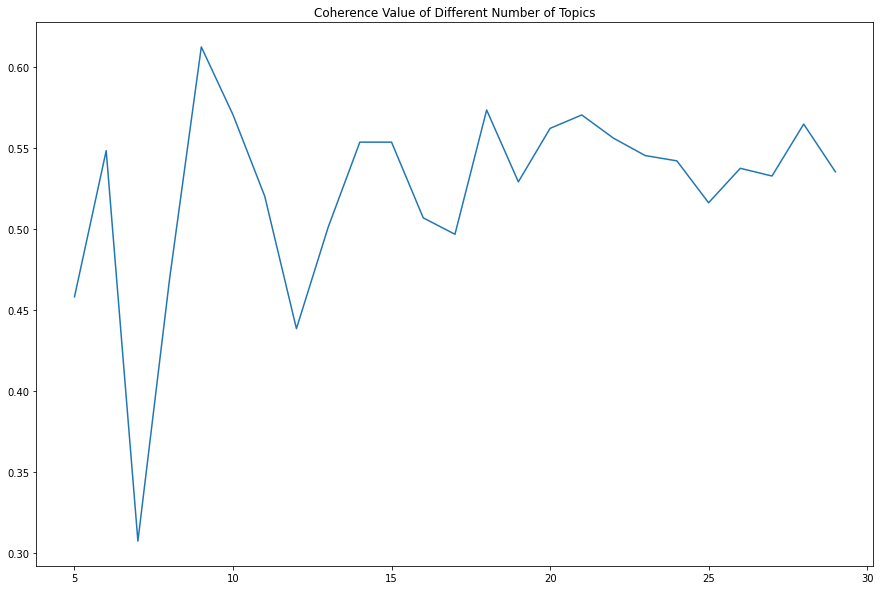

In [196]:
# Check the coherence and perplexity of the topics
from gensim.models import CoherenceModel

coherence = []
for i in range(5,30):
    lda_test = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary, passes=100)
    coherence_model_lda = CoherenceModel(model=lda_test, texts=cleaned_posts, dictionary=dictionary, coherence='c_v')
    coherence.append(coherence_model_lda.get_coherence())

plt.figure(figsize=(15,10))
plt.plot([i for i in range(5,30)], coherence)
plt.title("Coherence Value of Different Number of Topics")

plt.show()

* Peak at around 15 topics
* General sawtooth shape

## Topic Summary: Topics that could be extracted from the results
1. (likely) About lockdown in Wuhan 
2. (likely) About thanking the medical personnel in Wuhan 
3. (likely) About cases in Wuhan
4. (likely) About the border in Guangxi province 
5. (likely) About patent of the drug 
6. (likely) About top medical expert in the country, Zhong Nanshan 
7. (likely) About the salary of doctors 
8. (highly likely) About cases in Guangzhou's black community 
9. (highly likely) About Japan's testing kit 
10. (highly likely) About Russia and lions 
11. (definitely) About a person who's been through earthquakes and the pandemic 
12. (definitely) About a woman trying to obtain a USA green card by donating masks 
13. (definitely) About battleships with medical facilities on them in the USA 
14. (definitely) About returning to work 
15. (definitely) About returning to elementary school 
* Topics are quite specific, which show that they are reposted quite a lot
* Some topics are contaminated in the results by other keywords, which may contain maore latent topics

In [250]:
from itertools import chain
from operator import itemgetter

# get a list of probabilities of being a topic for each post
topic_prob = [lda_model.get_document_topics(item) for item in bow_corpus]

# extract the maximum probability for each of them
topics = []
for prob in topic_prob:
    topic = max(prob, key=itemgetter(1))[0]
    topics.append(topic)



In [198]:
# Preprocess the comments

# Remove non-English, Chinese characters, or numbers
def clean_comment(text):
    text_cleaner = re.compile(pattern="[^"
        u"\u4e00-\u9fa5"      # Chinese characters
        u"\uFF00-\uFFEF"      # Halfwidth and Fullwidth forms
        u"a-zA-Z0-9"
        "]+"
        , flags=re.UNICODE)
    new_text = text_cleaner.sub(r'', text)  # Replace all characters that does not fit the above the regular expression

    rubbish_remover = re.compile(pattern="^:[quick turn|turn send|weibo]+", flags=re.UNICODE) # Remove the colon and generic comment texts
    new_text = rubbish_remover.sub(r'', new_text)

    return new_text

all_cleaned_comments = []

for index, row in comments.iterrows():  # For every fake news
    all_comments = row['comments']
    if all_comments == []:     # If no comments on the post
        all_cleaned_comments.append([])    # Append an empty list to indicate the corresponding post has no comments
    else:
        cleaned_comments = []
        for comment_info in all_comments:   # For every comment on the post
            comment = clean_comment(comment_info['text'])   # First layer of filtering by cleaning the unnecessary rubbish
            if comment != []:  # Only separate the comment if it is not empty after cleaning the words
                word_flags = pseg.lcut(comment)
                cleaned_comment = []
                for word_flag in word_flags:
                    if word_flag.flag in ['ns', 'n', 'v', 'a']:     # Keep adjective as well because that usually shows emotion
                        cleaned_comment.append(word_flag.word)
                cleaned_comments.append(clean_stopword(cleaned_comment))    # Remove stopwords
        all_cleaned_comments.append(cleaned_comments)



# Total number of comments: 16456

In [199]:
f = []
f.append([])

f.append([['f'],['a']])
print (f)

print (len(all_cleaned_comments))

[[], [['f'], ['a']]]
344


In [200]:
# Training a word2vec model